In [6]:
%matplotlib inline

from gplearn.genetic import SymbolicRegressor
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.display import Image
import pydot

In [9]:
import pandas as pd
test_data = pd.read_csv('scopely_test.csv', header=None, index_col=0)

l = len(test_data)
X_train = test_data.index.values.reshape(l,1)
y_train = test_data.values.reshape(l,1)

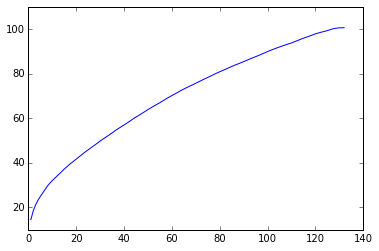

In [10]:
plt.plot(X_train, y_train)

In [110]:
est_gp = SymbolicRegressor(population_size=6000, generations=60, 
                           comparison=False, transformer=True, 
                           p_crossover=0.7, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1, tournament_size=5,
                           parsimony_coefficient=0.1, random_state=0)

est_gp.fit(X_train, y_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    14.25    3595625.05053       10    3.73550897188    3.74267434291      1.35m
   1    11.83    23307.8475686       16    3.42898091588    4.51231380384      1.55m
   2    11.81    463.211695905       16    3.52517016092    3.70157588137      1.54m
   3     9.01    780.028054152       43    3.48672825502    4.39583945422      1.48m
   4     5.77    606.657690832       42    3.32326072143    4.03267584538      1.40m
   5     5.34    322.798498173       15    1.95055109917    2.32052935321      1.33m
   6     7.78    913.504493402       15    1.96166702241     2.2268380001      1.30m
   7    11.59    2566.73005681       15    1.97808223931    2.08848117198      1.30m
   8    15.61    1535.69578897       24    1.21620337223    1.49728081396  

/Users/liuguo/anaconda/lib/python2.7/site-packages/gplearn/skutils/validation.py:444: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SymbolicRegressor(comparison=False, const_range=(-1.0, 1.0), generations=60,
         init_depth=(2, 6), init_method='half and half', max_samples=0.9,
         metric='mean absolute error', n_jobs=1, p_crossover=0.7,
         p_hoist_mutation=0.05, p_point_mutation=0.1, p_point_replace=0.05,
         p_subtree_mutation=0.1, parsimony_coefficient=0.1,
         population_size=6000, random_state=0, stopping_criteria=0.0,
         tournament_size=5, transformer=True, trigonometric=False,
         verbose=1)

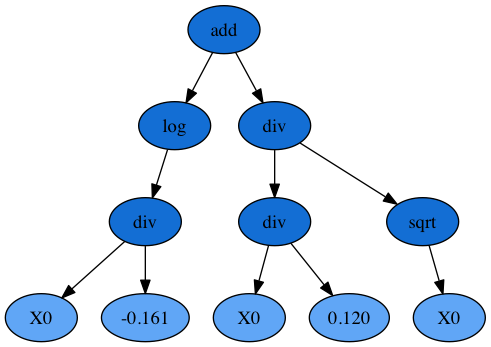

In [116]:
graph = pydot.graph_from_dot_data(est_gp._program.export_graphviz())
Image(graph.create_png())

The result is:

$\log(\frac{x}{-0.161})+\frac{\frac{x}{0.12}}{\sqrt{x}}$ 

We can organize the above equation and get:

$\log(x)+c_1\sqrt{x}+c_2$

Compare to the model we used:
    
$c_1\log(x)+c_2x+c_3$

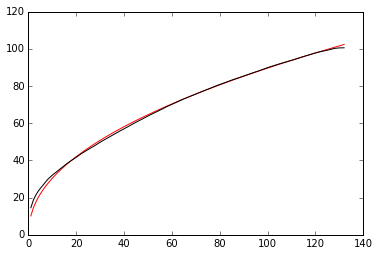

In [117]:
y_gp = est_gp.predict(X_train)

plt.plot(X_train, y_gp, 'r')
plt.plot(X_train, y_train, 'k')

In [13]:
from IPython.display import display, HTML
js = """<script>$('.math>span').css("border-left-color","transparent");</script>"""
display(HTML(js))